# Binary classification


assign a class to something -> uso logistic regression (continua differenziabile e ha quasi valori discreti)

Nel caso in esame:
-   **X**   &nbsp; &nbsp; &nbsp; vettore, sono le <u>features</u>, &nbsp; &nbsp; &nbsp; grandezze numeriche che caratterizzanop un sample
     - $x_0$ &nbsp; &nbsp; &nbsp; è il numero di ore studiate
     - $x_1$ &nbsp; &nbsp; &nbsp; è il numero di ore di ezione seguite
-   **Y**   &nbsp; &nbsp; &nbsp; vettore, è l'esito o la classe assegnata nei dati a disposizione
    - $0$ &nbsp; &nbsp; &nbsp; bocciato
    - $1$ &nbsp; &nbsp; &nbsp; passato

### sigmoid &nbsp; &nbsp; &nbsp; &nbsp; logreg_inference
$\hat p \ = $ stima della probabilità che per <u>una</u> data $x$ la classe corretta è la 1

$p̂ \simeq P (y=1|x) = \sigma (z) = \frac{1}{1+e^{-z}} $


In [103]:
def logreg_inference(x, w, b):
    z = logit(x, w, b) # <---
    
    return 1 / ( 1 + np.exp(-z))

### logit
- linear function
- applied to compute a score

$logit = z = W^T \cdot X + b$

In [104]:
def logit(x, w, b):
    z = (x @ w) + b

    return z 

### cross entropy
probabilità di osservare il training set con il modello w, b che ho

quanto è buono il modello

In [105]:
def cross_entropy(P, Y):

    return (-Y * np.log(P) - (1 - Y) * np.log(1 - P)).mean()

### logreg training

In [106]:
def logreg_train(X,Y):

    # initial values   starting point
    (n_dati, n_features) = X.shape
    w = np.zeros(n_features) # vettore
    b = 0

    lr = 0.01 # learning rate

    for step in range(100000):
        
        # stima della probabilità che per una data x la classe corretta è la 1
        P = logreg_inference(X, w, b) # <---

        # probabilità di osservare il training set con il modello w, b che ho
        # quanto è buono il modello
        if step % 1000 == 0:     # to print every thousand cycles
            loss = cross_entropy(P, Y)   # <--- 
            print("step:", step,"    loss:  ", loss)

        # Gradient descent
        grad_w = (X.T @ (P - Y)) / n_dati  # gradient w.r.t. w     .T per fare il trasposto
        grad_b = (P - Y).mean()       # gradient w.r.t. b
        w -= lr * grad_w  # aggiorno w e b
        b -= lr * grad_b

    return w, b

## Main


### import libraries & other

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# for scatter colors
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'green'])
classes = ['bocciato', 'passato']

### lettura dati

In [108]:
data = np.loadtxt("exam.txt")

X = data[:, :-1] 
# tutte le righe, tutte le colonne - l'ultima
# contiene tutte le [X0, X1]

Y = data[:, -1]
# tutte le righe, ultima colonna
# contiene l'esito, la classe

### launch training function <---

In [ ]:
w, b = logreg_train(X,Y)

### plot

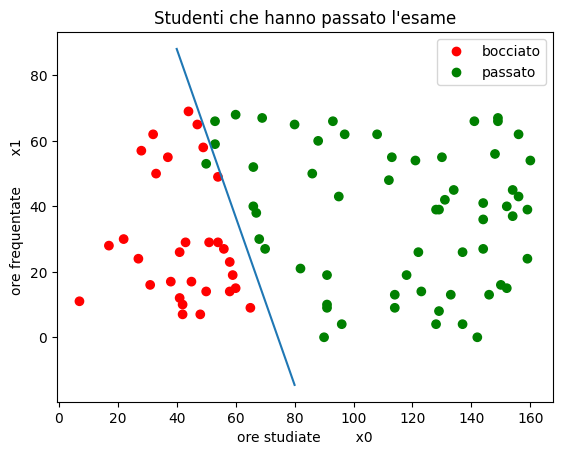

In [110]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=colors)

# decision boundary
x0 = np.linspace(40,80,100)
x1 = 1/w[1]*(-w[0]*x0-b)
plt.plot(x0, x1)

plt.title("Studenti che hanno passato l'esame")
plt.xlabel("ore studiate        x0"); plt.ylabel("ore frequentate       x1")
plt.legend(handles=scatter.legend_elements()[0], labels=classes); plt.show()